In [7]:
#Importing Packages 
%matplotlib inline
import operator
import itertools
import numpy as np
import pandas as pd
from ggplot import *
import seaborn as sns
import matplotlib as mpl
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import euclidean_distances, silhouette_score
rcParams['figure.figsize'] = 15, 5

In [9]:
#Importing data
data_train = pd.read_csv('C:/Users/LTD/Desktop/Git/NLP & Clustering/papers_data.csv')
data_train = data_train[['title', 'groups', 'keywords', 'topics']]
print (len(data_train))
data_train.head()

398


,title,groups,keywords,topics
0,Kernelized Bayesian Transfer Learning,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...
1,"""Source Free"" Transfer Learning for Text Class...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...
2,A Generalization of Probabilistic Serial to Ra...,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting
3,Lifetime Lexical Variation in Social Media,NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...
4,Hybrid Singular Value Thresholding for Tensor ...,Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...


In [10]:
#Stretching the Data Frame Row-wise as a Function of Groups
s = data_train['groups'].str.split('\n').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'groups'
del data_train['groups']
data_train = data_train.join(s).reset_index()

In [11]:
#Adding New Variable for Group Membership
data_train['flags'] = pd.Series(np.ones(len(data_train)),
index=data_train.index)
data_train.head()

,index,title,keywords,topics,groups,flags
0,0,Kernelized Bayesian Transfer Learning,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Novel Machine Learning Algorithms (NMLA),1.0
1,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,AI and the Web (AIW),1.0
2,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Novel Machine Learning Algorithms (NMLA),1.0
3,2,A Generalization of Probabilistic Serial to Ra...,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,Game Theory and Economic Paradigms (GTEP),1.0
4,3,Lifetime Lexical Variation in Social Media,Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,NLP and Text Mining (NLPTM),1.0


In [12]:
#Adding a Function for Matrix Creation
def matrix_from_df(data_train):
    matrix = data_train.pivot_table(index = ['title'], columns=['groups'],values='flags')
    matrix = matrix.fillna(0).reset_index()
    x_cols = matrix.columns[1:]
    return matrix, x_cols

In [13]:
#Retrieve Matrix and x cols from the matric_from_df Method
matrix, x_cols = matrix_from_df(data_train)
matrix.head()

groups,title,AI and the Web (AIW),Applications (APP),Cognitive Modeling (CM),Cognitive Systems (CS),Computational Sustainability and AI (CSAI),Game Playing and Interactive Entertainment (GPIE),Game Theory and Economic Paradigms (GTEP),Heuristic Search and Optimization (HSO),Human-Computation and Crowd Sourcing (HCC),...,Multiagent Systems (MAS),NLP and Knowledge Representation (NLPKR),NLP and Machine Learning (NLPML),NLP and Text Mining (NLPTM),Novel Machine Learning Algorithms (NMLA),Planning and Scheduling (PS),Reasoning under Uncertainty (RU),Robotics (ROB),Search and Constraint Satisfaction (SCS),Vision (VIS)
0,"""Source Free"" Transfer Learning for Text Class...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A Characterization of the Single-Peaked Single...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"A Computational Method for (MSS,CoMSS) Partiti...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,A Control Dichotomy for Pure Scoring Rules,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A Convex Formulation for Semi-supervised Multi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5,1,'Elbow for KMeans clustering')

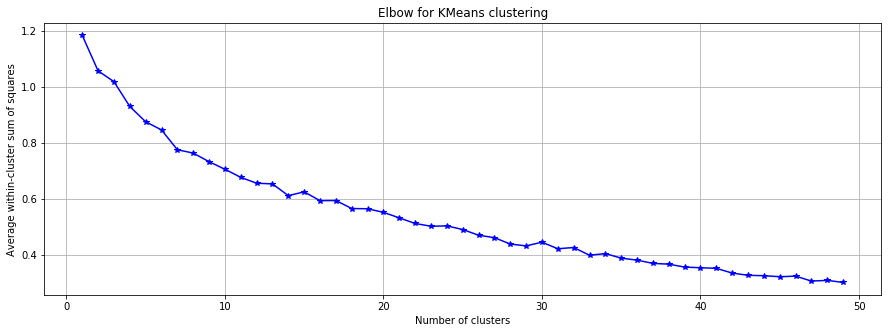

In [15]:
#Applying Elbow Method and Variance Explained on Data Matrix
matrix, x_cols = matrix_from_df(data_train)
X = matrix[x_cols]
K = range(1,50)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

Text(0.5,1,'Elbow for KMeans clustering')

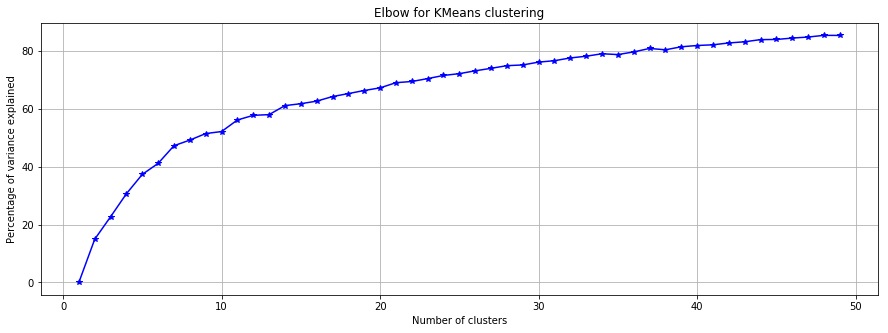

In [16]:
#Applying Elbow Method and Variance Explained to Data Matrix
matrix, x_cols = matrix_from_df(data_train)
X = matrix[x_cols]
K = range(1,50)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

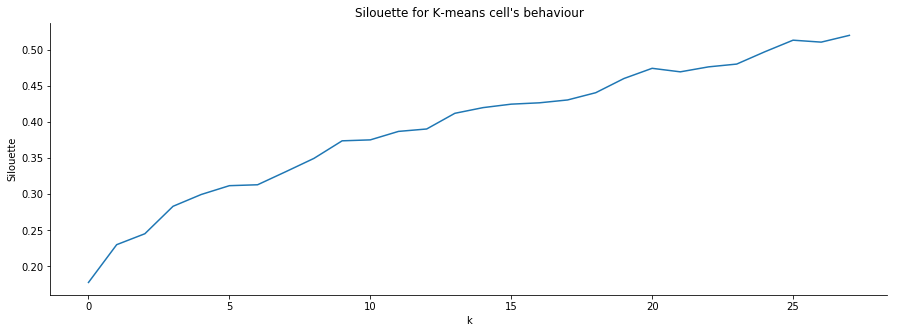

In [17]:
#Plotting Silhouette Score Plot from the Data Matrix
s = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    s.append(silhouette_score(X, labels, metric='euclidean'))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

In [18]:
#Training k-means Model for Cluster Size of 9
matrix, x_cols = matrix_from_df(data_train)
X = matrix[x_cols]
cluster = KMeans(n_clusters = 9, random_state = 2)
matrix['cluster'] = cluster.fit_predict(X)
matrix.cluster.value_counts()

0    81
1    78
5    44
3    38
6    36
2    32
8    30
7    30
4    27
Name: cluster, dtype: int64

In [19]:
#Using PCA to Transform Group-Related Features into Two Components
pca = PCA(n_components=2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()
customer_clusters = matrix[['title', 'cluster', 'x', 'y']]
customer_clusters.head()

groups,title,cluster,x,y
0,"""Source Free"" Transfer Learning for Text Class...",1,0.615810,-0.060295
1,A Characterization of the Single-Peaked Single...,8,-0.756838,0.971322
2,"A Computational Method for (MSS,CoMSS) Partiti...",4,-0.287956,-0.216148
3,A Control Dichotomy for Pure Scoring Rules,2,-0.521295,0.570206
4,A Convex Formulation for Semi-supervised Multi...,3,0.198578,-0.129668


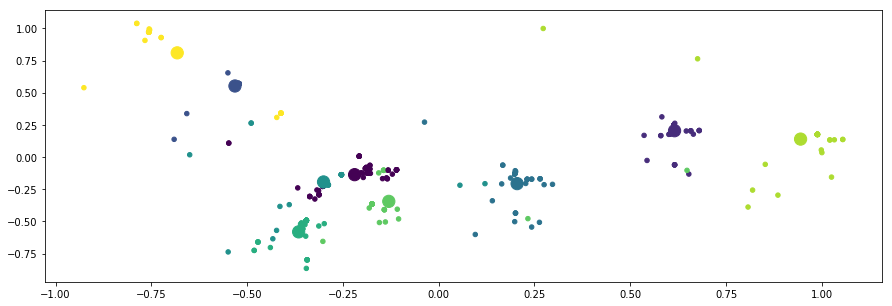

In [21]:
#Plotting Clusters in a Two-Dimensional Space
cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['x', 'y'])
cluster_centers['cluster'] = range(0, len(cluster_centers))
plt.scatter(customer_clusters['x'], customer_clusters['y'], s = 20,
c=customer_clusters['cluster'])
plt.scatter(cluster_centers['x'], cluster_centers['y'], s = 150, c=cluster_centers['cluster'])

In [22]:
#Merging Matrix into the Original Data Frame
customer_clusters.columns.name = None
df = data_train.merge(customer_clusters, on='title')
df.head()

,index,title,keywords,topics,groups,flags,cluster,x,y
0,0,Kernelized Bayesian Transfer Learning,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Novel Machine Learning Algorithms (NMLA),1.0,1,0.613870,0.245408
1,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,AI and the Web (AIW),1.0,1,0.615810,-0.060295
2,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Novel Machine Learning Algorithms (NMLA),1.0,1,0.615810,-0.060295
3,2,A Generalization of Probabilistic Serial to Ra...,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,Game Theory and Economic Paradigms (GTEP),1.0,2,-0.521295,0.570206
4,3,Lifetime Lexical Variation in Social Media,Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,NLP and Text Mining (NLPTM),1.0,0,-0.183192,-0.090091


In [25]:
#Creating Function to Generate Wordcloud
def wordcloud_object(word_string):
    FONT_ROOT = './fonts/'
    wordcloud = WordCloud(font_path=FONT_ROOT + 'arial.ttf',stopwords=STOPWORDS, background_color='black', width=1200,height=1000).generate(' '.join(word_string))
    return wordcloud

In [26]:
#Creating Function to Plot Wordcloud for Each Cluster
def plot_wordcloud(df, clusters, pivot):
    fig = plt.figure(figsize=(15,29.5))
    for cluster in range(clusters):
        List_ = []
        for x in df[df['cluster']==cluster][pivot]:
            try:
                List_.extend(x.split('\n'))
            except:
                pass
        if List_:
            ax = fig.add_subplot(5,2,cluster+1)
            wordcloud = wordcloud_object(List_)
            plt.title('Cluster: %d'%(cluster+1))
            ax.imshow(wordcloud)
            ax.axis('off')

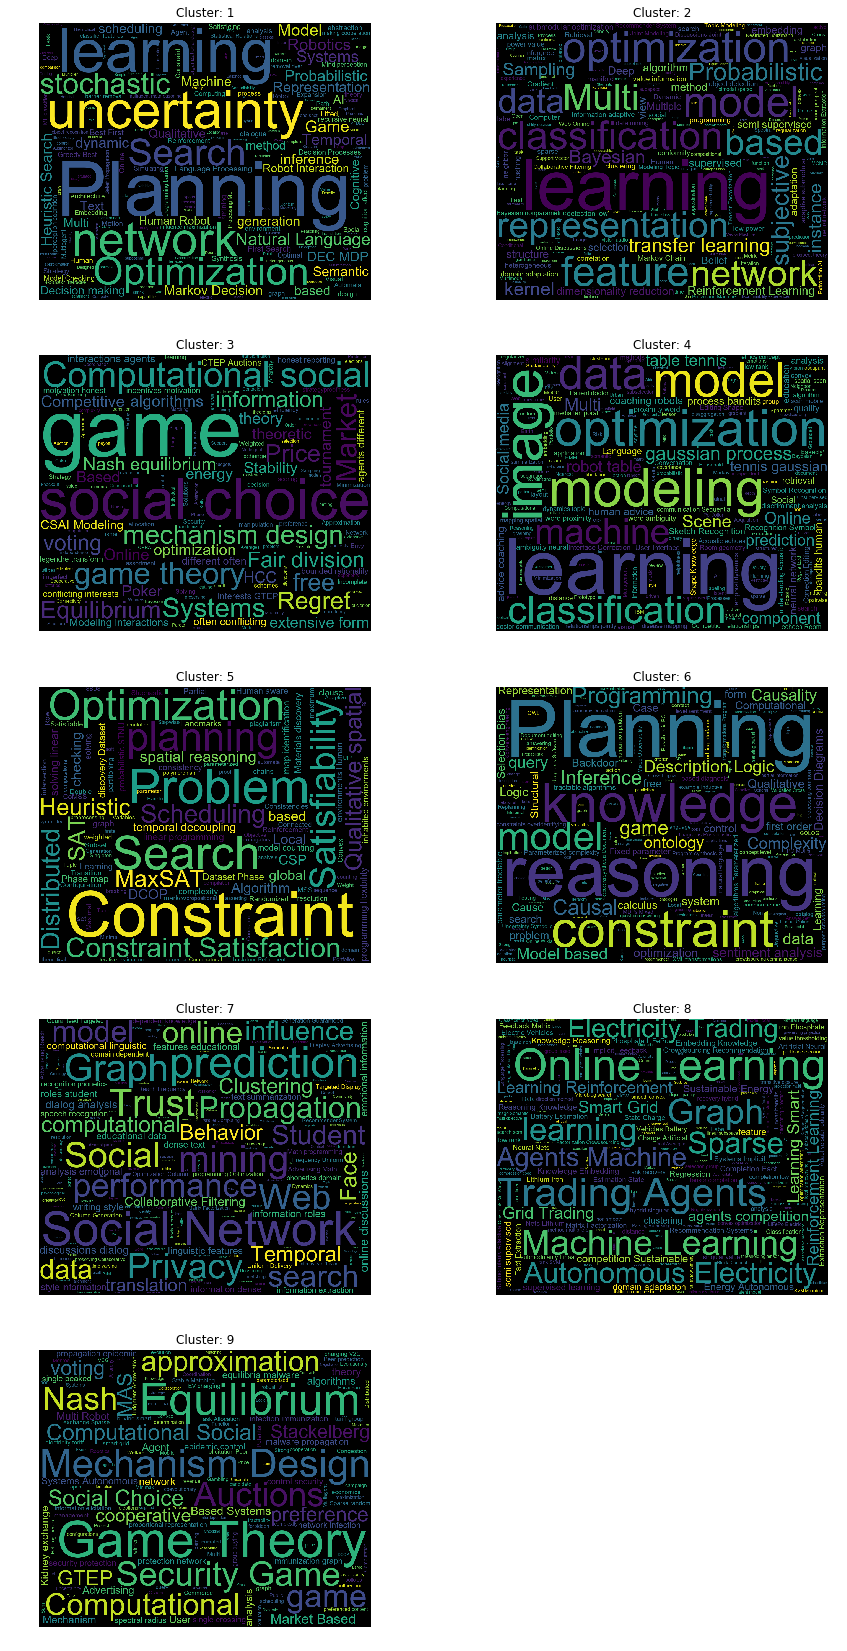

In [27]:
#Generating Wordclouds of Feature Named ‘Keywords’
plot_wordcloud(df, cluster.n_clusters, 'keywords')

Nine are clusters as follows:
• Cluster 1: Papers talking about search and robotics
• Cluster 2: Papers talking in depth about models’ learning and
optimization
• Cluster 3: Topics of application of data analytics in games and
social media analytics
• Cluster 4: Topics of image recognition, robotics, and social media
analytics
• Cluster 5: Topics of linear programming and search
• Cluster 6: Papers on reasoning-based models
• Cluster 7: Papers on application of data sciences in social graphs
and other online mediums
• Cluster 8: Topics ranging in knowledge graphs
• Cluster 9: Papers concentrating on game theory and data security

In [31]:
def perform_cluster_group_audit(clusters, term):
    for cluster in clusters:
        df_cluster = df[df['cluster'] == cluster]
        print ('Cluster number: %d'%(cluster + 1))
        keywords = list(df_cluster['keywords'])
        keywords = [keyword.split('\n') for keyword in keywords]
        keywords = [item for sublist in keywords for item in sublist]
        keywords = [keyword.lower() for keyword in keywords if term in keyword.lower()]
        keywords_freq = {x:keywords.count(x) for x in keywords}
        print (sorted(keywords_freq.items(), key=operator.itemgetter(1),reverse=True))
        print ('\n')

In [32]:
#Using Function to Find Keywords for Search in clusters 0 and 4
perform_cluster_group_audit([0,4], 'search')

Cluster number: 1
[('heuristic search', 7), ('greedy best first search', 4), ('monte carlo tree search', 2), ('similarity search', 1), ('approximate nearest neighbor search', 1), ('incremental search', 1), ('real-time search', 1), ('agent-centered search', 1), ('hierarchical search', 1), ('parallel search', 1), ('bounded suboptimal search', 1), ('best-first search', 1), ('suboptimal heuristic search', 1)]


Cluster number: 5
[('heuristic search', 3), ('search', 3), ('local search', 2), ('stochastic local search', 2), ('and/or search', 2)]




In [33]:
#Using Function to Find Keywords for Social in Clusters 2, 3, and 6
perform_cluster_group_audit([2,3,6], 'social')

Cluster number: 3
[('computational social choice', 11), ('social choice theory', 2), ('social decision schemes', 2), ('randomized social choice', 1)]


Cluster number: 4
[('social media', 5), ('social spammer', 2), ('social image classification', 2)]


Cluster number: 7
[('social networks', 6), ('social infectivity', 3), ('social network', 3), ('location based social network', 2), ('social network analysis', 2), ('social influence', 2), ('social dynamics', 1), ('social explanation', 1)]




In [35]:
#Defining Function to Plot the Clusters for Gaussian Mixture Model
def plot_results(X, Y_, means, covariances, index, title):
    color_iter = itertools.cycle(['b', 'g', 'red', 'm', 'y', 'navy', 'c','cornflowerblue', 'gold','darkorange'])
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = np.linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w
        [0] / np.linalg.norm(w[0])
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle,color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
    plt.xlim(0.0, 0.1)
    plt.ylim(-0.2, 1.2)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

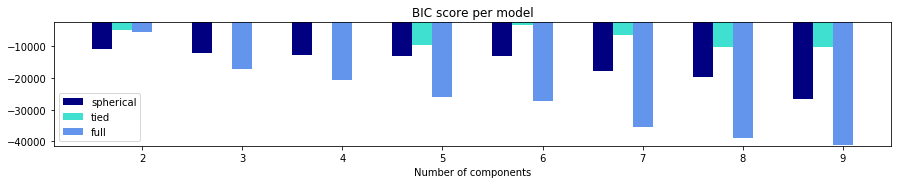

In [78]:
matrix, x_cols = matrix_from_df(data_train)
X = matrix[x_cols].values
model_stats = []
n_components_range = range(2, 10)
cv_types = ['spherical', 'tied', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type, random_state=0)
        gmm.fit(X)
        model_stats.append({'name':'%s_%d'%(cv_type, n_components),'model':gmm, 'bic':gmm.bic(X)})
bic = np.array([m_type['bic'] for m_type in model_stats])
best_gmm = model_stats[bic.argmax()]
clf = best_gmm['model']
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue'])
bars = []
# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)],width=.2, color=color))
    
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [88]:
#Display Frequency of Objects in Each Cluster
matrix['cluster'] = labels
matrix.cluster.value_counts()

0    232
1    108
2     56
Name: cluster, dtype: int64

In [93]:
#Merging Matrix into the Initial Data Frame
customer_clusters.columns.name = None
df = data_train.merge(matrix, on='title')

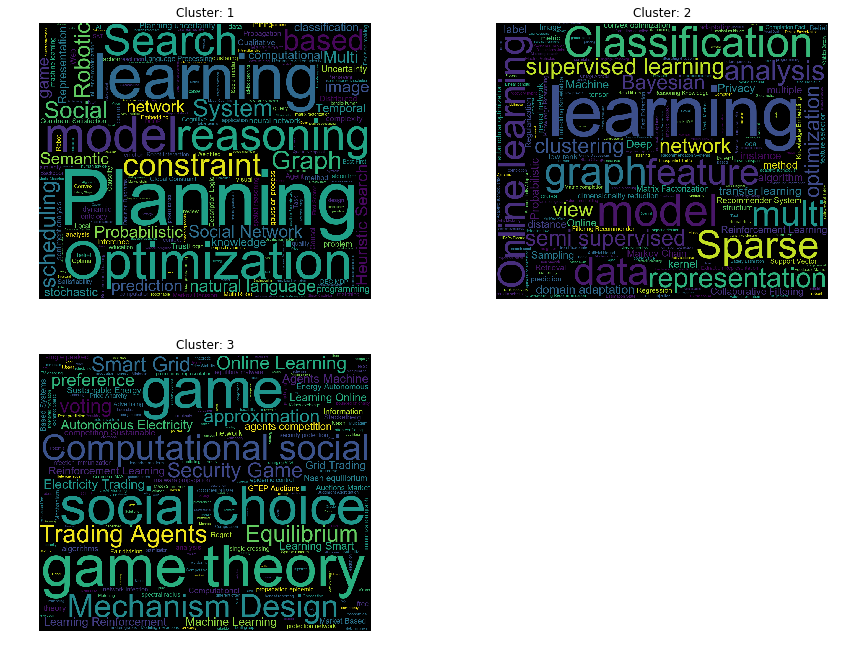

In [94]:
#Generating Wordclouds of Feature Named “Keywords”
plot_wordcloud(df, 3, 'keywords')

• Cluster 1: Papers discussing in depth game theory and social media analytics

• Cluster 2: Papers discussing in depth model optimization and models’ learning

• Cluster 3: Topics on linear  programming, knowledge graphs, and reasoning-based models